In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield
from mhsflex.vis import plot, plot_plasma_parameters
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

In [22]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02

nf_max = 200

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

In [23]:
data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [24]:
folder = "/Users/lilli/Desktop/Thesis/Performance"

In [25]:
# Height profile f parameters
a = 0.44
alpha = 0.5
b = 1.0

# Magnitc field parameters

a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = 1.0 / z0

In [26]:
data3d = calculate_magfield(data2d, a, b, alpha, z0, deltaz)

data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

data3dL = calculate_magfield(
    data2d, a, b, alpha, z0, deltaz, asymptotic=False, tanh=False
)

In [27]:
maxcoord = np.unravel_index(np.argmax(data3d.bz, axis=None), data3d.bz.shape)
iy = int(maxcoord[0])
ix = int(maxcoord[1])

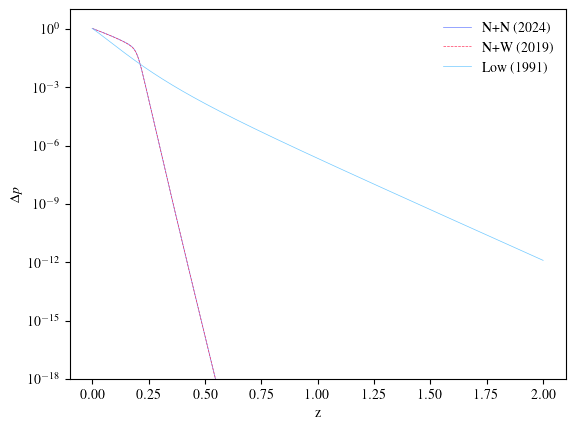

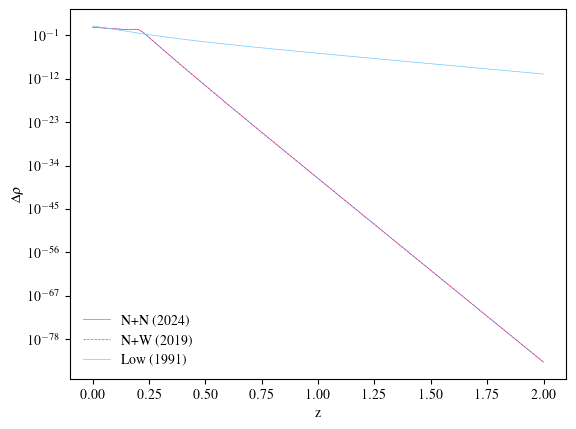

In [36]:
plt.plot(
    z_arr, abs(data3d.dpressure[iy, ix, :]), linewidth=0.5, color=c2, label="N+N (2024)"
)
plt.plot(
    z_arr,
    abs(data3dNW.dpressure[iy, ix, :]),
    linewidth=0.5,
    color=c4,
    linestyle="dashed",
    label="N+W (2019)",
)
plt.plot(
    z_arr,
    abs(data3dL.dpressure[iy, ix, :]),
    linewidth=0.5,
    color=c1,
    label="Low (1991)",
)
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.ylabel(r"$\Delta p$")
plt.yscale("log")
plt.legend(frameon=False)
plt.ylim([10**-18, 10**1])
plotname = folder + "/comp_low_pres.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()


plt.plot(
    z_arr, abs(data3d.ddensity[iy, ix, :]), linewidth=0.5, color=c2, label="N+N (2024)"
)
plt.plot(
    z_arr,
    abs(data3dNW.ddensity[iy, ix, :]),
    linewidth=0.5,
    color=c4,
    linestyle="dashed",
    label="N+W (2019)",
)
plt.plot(
    z_arr, abs(data3dL.ddensity[iy, ix, :]), linewidth=0.5, color=c1, label="Low (1991)"
)
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.yscale("log")
plt.legend(frameon=False)
plt.ylabel(r"$ \Delta \rho$")
#plt.ylim([10**-72, 10**3])
plotname = folder + "/comp_low_den.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()